# (Dataset Exploration Title)
## by Jem Chang

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [141]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [59]:
# Import Ford GoBike csv file into jupyter notebook
df = pd.read_csv('2017-fordgobike-tripdata.csv')

### What is the structure of your dataset?

> This dataset includes 519,700 trips with 15 features.

| Variable Name          | Definition                 |
|------------------------|----------------------------|
| duration_sec           | int64                      |
| start_time             | string                     |
| end_time               | string                     |
| start_station_id       | int64                      |
| start_station_name     | string                     |
| start_station_latitude | float64                    |
| start_station_longitude| float64                    |
| end_station_id         | int64                      |
| end_station_name       | string                     |
| end_station_latitude   | float64                    |
| end_station_longitude  | float64                    |
| bike_id                | int64                      |
| user_type              | string                     |
| member_birth_year      | float64                    |
| member_gender          | string                     |
 
* The time variables in this dataset are all string. They need to be converted to datetime format for the analysis. Also, the time variables can be brokend down into time of day, day of the week, or month of the year.  
* The dataset only provides membership birth year by using the year of dataset, 2017 to calculate the age of membership.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in figuring out when and where are most trips taken in terms of time and location. Also, I am interested in what are the characteristics (age, sex, and user_type) of the riders in this time and location.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect starting points to give the information about the trip such as start time and start station name. I will learn more user characteristics based on user type, membership birth year and membership birth gender.

In [4]:
# Find out the structure of the dataset
print(df.shape)
print(df.info())
print(df.head(10))

(519700, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB
None
   duration_sec                start_time                

In [60]:
# 1. Convert time variables from string to datetime
# a. month of the year
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_month_num'] = df['start_time'].apply(lambda time: time.month)
df['start_month_char'] = df['start_month_num'].apply(lambda x: calendar.month_abbr[x])

In [61]:
# b. morning, afternoon, night of the day
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df['period_day'] = 'morning'
df['period_day'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'afternoon'
df['period_day'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'night'

/Users/jemchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/jemchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [62]:
# Test: period of day
df['period_day'].value_counts()

afternoon    209620
morning      195925
night        114155
Name: period_day, dtype: int64

In [63]:
# c. Day of the week
df['start_weekday_num'] = df['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['start_weekday_char'] = df['start_weekday_num'].map(dmap)

In [64]:
# 2. Create ages
df['age'] = df['member_birth_year'].apply(lambda x: 2017 - x)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [149]:
# 1. Time: months
mon_counts = df['start_month_char'].value_counts()
mon_order = mon_counts.index

In [150]:
n_df = df.shape[0]
max_mon_counts = mon_counts[0]
max_prop = max_mon_counts / n_df
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

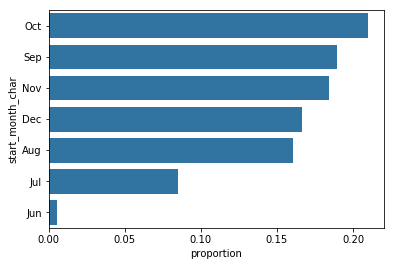

In [152]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='start_month_char', color=base_color, order=mon_order)
plt.xticks(tick_props * n_df, tick_names)
plt.xlabel('proportion');

why there is only little data in June? 

In [153]:
df_6 = df.query('start_month_num == 6')
df_6['day'] = df_6['start_time'].apply(lambda x: x.day)
df_6['day'].value_counts()

/Users/jemchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


30    1038
29    1019
28     632
Name: day, dtype: int64

After checking online information (https://en.wikipedia.org/wiki/Ford_GoBike), Ford GoBike was launched since June 28, 2017. So there is no data before June 28, 2017, so I decide to remove June data from the analysis.

In [156]:
df2 = df.query('start_month_num != 6')

In [161]:
# 2. Location: there are 272 stations in this dataset. 
print(len(df2['start_station_name'].value_counts()))
df2['start_station_name'].value_counts()

272


San Francisco Ferry Building (Harry Bridges Plaza)                 14978
The Embarcadero at Sansome St                                      13517
San Francisco Caltrain (Townsend St at 4th St)                     12366
San Francisco Caltrain Station 2  (Townsend St at 4th St)          12003
Market St at 10th St                                               11852
Montgomery St BART Station (Market St at 2nd St)                   11207
Berry St at 4th St                                                 10856
Powell St BART Station (Market St at 4th St)                       10097
Howard St at Beale St                                               9809
Steuart St at Market St                                             9347
Powell St BART Station (Market St at 5th St)                        7910
Embarcadero BART Station (Beale St at Market St)                    7549
2nd St at Townsend St - Coming Soon                                 6487
3rd St at Townsend St                              

There are 272 stations in this dataset. I zoom in to look into Top 8 stations that are located in San Francisco.

In [162]:
# if they have high traffic as end stations? Looks like yes!
print(len(df2['end_station_name'].value_counts()))
df2['end_station_name'].value_counts()

272


San Francisco Caltrain (Townsend St at 4th St)                     17154
San Francisco Ferry Building (Harry Bridges Plaza)                 16856
The Embarcadero at Sansome St                                      16383
San Francisco Caltrain Station 2  (Townsend St at 4th St)          13563
Montgomery St BART Station (Market St at 2nd St)                   13300
Market St at 10th St                                               11223
Powell St BART Station (Market St at 4th St)                       11026
Berry St at 4th St                                                 10512
Steuart St at Market St                                             9321
Powell St BART Station (Market St at 5th St)                        8477
Howard St at Beale St                                               7687
2nd St at Townsend St - Coming Soon                                 7173
Townsend St at 7th St                                               6591
Embarcadero BART Station (Beale St at Market St)   

In [163]:
# Subset the dataset by keeping only top 8 locations with high traffics. 
locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
df_top8 = df2.loc[df2['start_station_name'].isin(locs)]
df_top8['start_station_name'].value_counts()


San Francisco Ferry Building (Harry Bridges Plaza)           14978
The Embarcadero at Sansome St                                13517
San Francisco Caltrain (Townsend St at 4th St)               12366
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12003
Market St at 10th St                                         11852
Montgomery St BART Station (Market St at 2nd St)             11207
Berry St at 4th St                                           10856
Powell St BART Station (Market St at 4th St)                 10097
Name: start_station_name, dtype: int64

In [164]:
st_stat_counts = df_top8['start_station_name'].value_counts()
st_stat_order = st_stat_counts.index

In [165]:
n_df = df_top8.shape[0]
max_st_stat_counts = st_stat_counts[0]
max_prop = max_st_stat_counts / n_df
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

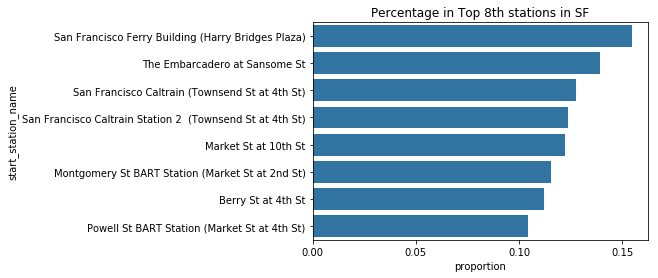

In [167]:
base_color = sb.color_palette()[0]
sb.countplot(data=df2, y='start_station_name', color=base_color, order=st_stat_order)
plt.xticks(tick_props * n_df, tick_names)
plt.xlabel('proportion')
plt.title('Percentage in Top 8th stations in SF');

In [168]:
# 1.1 Time: month (after subsetting, regenerate the distribution of month again)
mon_counts = df_top8['start_month_char'].value_counts()
mon_order = mon_counts.index

In [174]:
n_df = df_top8.shape[0]
max_mon_counts = mon_counts[0]
max_prop = max_mon_counts / n_df
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

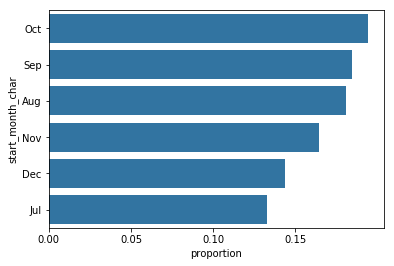

In [175]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_top8, y='start_month_char', color=base_color, order=mon_order)
plt.xticks(tick_props * n_df, tick_names)
plt.xlabel('proportion');

In [171]:
# 3. Time: period_day
day_counts = df_top8['period_day'].value_counts()
day_order = day_counts.index

In [176]:
n_df = df_top8.shape[0]
max_day_counts = day_counts[0]
max_prop = max_day_counts / n_df
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

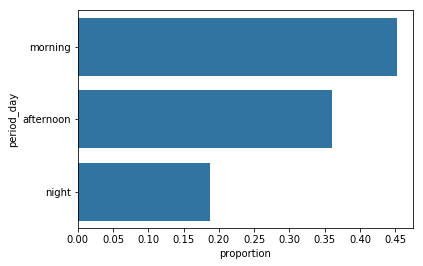

In [177]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_top8, y='period_day', color=base_color, order=day_order)
plt.xticks(tick_props * n_df, tick_names)
plt.xlabel('proportion');

In [178]:
# 4. Time: Weekday
week_counts = df_top8['start_weekday_char'].value_counts()
week_order = week_counts.index

In [179]:
n_df = df_top8.shape[0]
max_week_counts = week_counts[0]
max_prop = max_week_counts / n_df
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

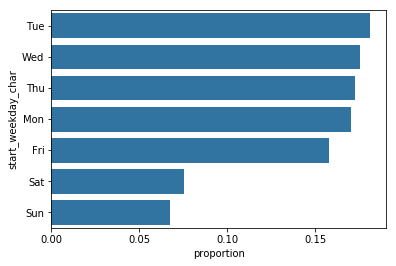

In [180]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_top8, y='start_weekday_char', color=base_color, order=week_order)
plt.xticks(tick_props * n_df, tick_names)
plt.xlabel('proportion');

In [181]:
# 4. user_type
user_counts = df_top8['user_type'].value_counts()
user_order = user_counts.index

In [182]:
n_df = df_top8.shape[0]
max_user_counts = user_counts[0]
max_prop = max_user_counts / n_df
tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

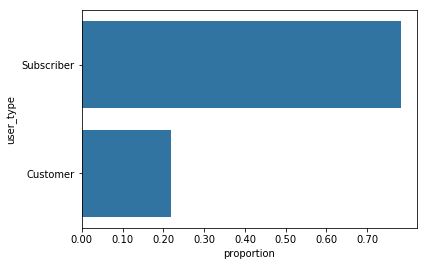

In [183]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_top8, y='user_type', color=base_color, order=user_order)
plt.xticks(tick_props * n_df, tick_names)
plt.xlabel('proportion');

In [184]:
# 5. Gender
sex_counts = df_top8['member_gender'].value_counts()
sex_order = sex_counts.index

In [185]:
n_df = df_top8.shape[0]
max_sex_counts = sex_counts[0]
max_prop = max_sex_counts / n_df
tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

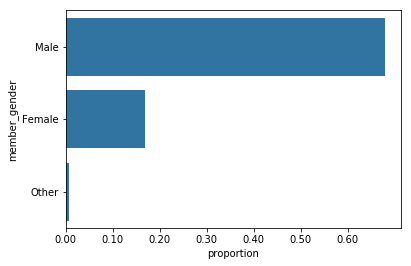

In [186]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_top8, y='member_gender', color=base_color, order=sex_order)
plt.xticks(tick_props * n_df, tick_names)
plt.xlabel('proportion');

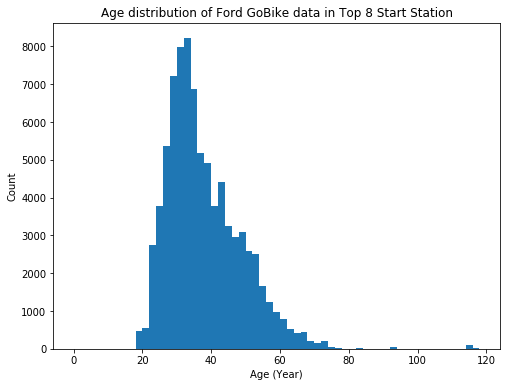

In [187]:
# 6. Age
plt.figure(figsize=(8,6))
bins = np.arange(0, df_top8['age'].max()+2, 2)
plt.hist(data=df_top8, x='age', bins=bins)
plt.xlabel('Age (Year)')
plt.ylabel('Count')
plt.title('Age distribution of Ford GoBike data in Top 8 Start Station');

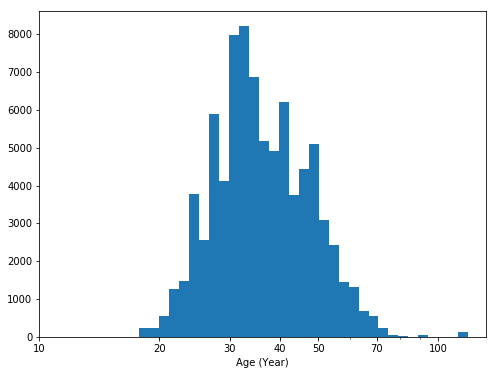

In [188]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df_top8['age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = df_top8, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,40,50,70,100], [10,20,30,40,50,70,100])
plt.xlabel('Age (Year)');

From the figure, age older than 100 looks like outliers to me, so I remove them from the dataset.

In [193]:
df_top8_le100 = df_top8.query('age <= 100')

In [194]:
df_top8_le100.query('age > 100').shape[0]

0

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [195]:
# Only use the subsetted dataset to perform the rest of analysis.
df_top8_le100.to_csv("2017-fordgobike-tripdata-clean.csv", index=False)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!